In [1]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore

In [2]:
countries=pd.read_csv("country-data.csv")

In [3]:
countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
feautures=["child_mort","exports","health","imports","income","inflation","total_fer"]

In [7]:
countries=countries.dropna(subset=feautures)

In [8]:
data=countries[feautures].copy()

In [9]:
data

,child_mort,exports,health,imports,income,inflation,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,2.13
...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,3.50
163,17.1,28.5,4.91,17.6,16500,45.90,2.47
164,23.3,72.0,6.84,80.2,4490,12.10,1.95
165,56.3,30.0,5.18,34.4,4480,23.60,4.67


1.scale the data 
2.initialise random centroids 
3.label each data point 
4.update centroids

In [10]:
data=((data-data.min())/(data.max()-data.min()))*9+1

In [11]:
data.describe()

,child_mort,exports,health,imports,income,inflation,total_fer
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2.562953,2.846005,3.799950,3.422865,2.196398,1.997380,3.552315
std,1.767090,1.234213,1.536454,1.252695,1.394816,0.879182,2.148995
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.247566,2.066676,2.739590,2.559251,1.198680,1.500693,1.915615
50%,1.731743,2.570951,3.522685,3.237094,1.676568,1.798447,2.788644
75%,3.607108,3.307102,4.798011,4.036535,2.605574,2.244247,4.875394
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
data.head()

,child_mort,exports,health,imports,income,inflation,total_fer
0,4.838364,1.445338,4.227470,3.319884,1.072425,2.135292,7.629338
1,1.613437,2.255779,3.651336,3.511336,1.674398,1.723593,1.709779
2,2.082278,2.724035,2.320075,2.621343,1.889285,2.689215,3.470032
3,6.100292,3.800121,1.581728,3.216396,1.382817,3.213197,8.111987
4,1.337390,3.043709,3.360472,4.044296,2.337870,1.469920,2.391167


In [15]:
def random_centroids(data,k):
    centroids=[]
    for i in range (k):
        centroid=data.apply(lambda x: float (x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)


 

In [16]:
centroids=random_centroids(data,5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3276\1878521819.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x: float (x.sample()))


In [17]:
centroids

,0,1,2,3,4
child_mort,3.462512,3.352970,1.056962,1.679163,4.798929
exports,3.800121,3.255324,1.210760,2.467395,2.845601
health,3.606588,2.096333,5.860783,2.454319,3.125544
imports,4.215050,4.111563,3.516510,2.372973,3.744182
income,1.918226,4.971501,4.530151,1.918226,4.971501
inflation,1.000000,1.857499,1.803438,2.622678,2.780704
total_fer,4.818612,1.340694,2.973186,3.853312,1.624606


In [24]:
def get_labels(data,centroids):

    distances=centroids.apply(lambda x : np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [25]:
labels =get_labels(data,centroids)

In [26]:
labels.value_counts()

3    67
0    55
2    32
1    13
Name: count, dtype: int64

In [27]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [29]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

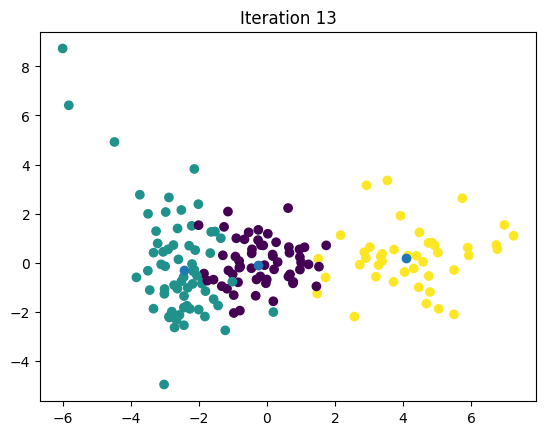

In [30]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [31]:

centroids

,0,1,2
child_mort,2.093707,1.222540,4.905806
exports,2.508136,3.181488,2.142574
health,2.872037,4.367243,3.220339
imports,3.036964,3.552339,3.046694
income,1.647088,2.946410,1.167363
inflation,2.044395,1.592744,2.201446
total_fer,2.968674,1.801402,6.617269


In [32]:
labels.value_counts()

1    66
0    58
2    43
Name: count, dtype: int64

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)